In [1]:
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close()
plt.rcParams.update({'font.size':16})

<Figure size 432x288 with 0 Axes>

In [2]:
import ffi_utils

In [3]:
import numpy as np

In [4]:
_, re_psi4, im_psi4 = np.loadtxt('/Users/sebastian.khan/Desktop/q18a0a0c025_144/psi3col.r9.l4.l2.m2.gz', unpack=True)
times, re_hlm, im_hlm = np.loadtxt('/Users/sebastian.khan/Desktop/q18a0a0c025_144/h3col.r9.l4.l2.m2.gz', unpack=True)


h = re_hlm - 1.j*im_hlm

In [5]:
# this is in units of M\omega?
f0 = ffi_utils.getCutoffFrequencyFromTwoPuncturesBBH(meta_filename="/Users/sebastian.khan/Desktop/q18a0a0c025_144/q18a0a0c025_144.bbh", safety_factor=0.45)
f0

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


0.06797569880145234

In [6]:
# news = ffi_utils.FFIIntegrate(np.column_stack((times, re_psi4-1.j*im_psi4)), f0) # note the sign convention
# strain = ffi_utils.FFIIntegrate(news, f0)
# s = strain[:,1].conj()
# s = strain[:,1].real - 1.j * strain[:,1].imag

In [7]:
strain = ffi_utils.psi4ToStrain(np.column_stack((times, re_psi4, im_psi4)), f0)
s = strain[:,1].conj()


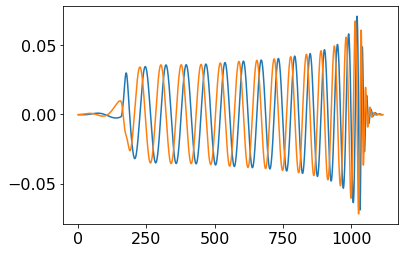

In [8]:
plt.plot(strain[:,0].real, s.real)
plt.plot(strain[:,0].real, s.imag)

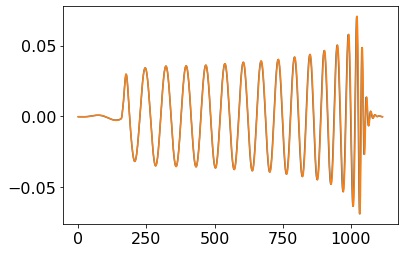

In [9]:
plt.plot(strain[:,0].real, s.real)
plt.plot(times, h.real)

In [10]:
plt.plot(strain[:,0].real, s.imag)
plt.plot(times, h.imag)

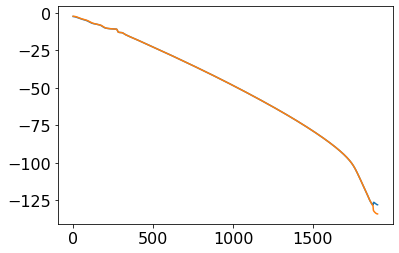

In [11]:
plt.plot(np.unwrap(np.angle(s)))
plt.plot(np.unwrap(np.angle(h)))

In [12]:
s

array([-0.00038505-0.00034956j, -0.00038748-0.00034334j,
       -0.00039001-0.00033642j, ..., -0.00037782-0.00037823j,
       -0.00038066-0.00036497j, -0.00038277-0.00035564j])

In [13]:
h

array([-0.00029526-0.00037706j, -0.00029798-0.00037534j,
       -0.00030094-0.00037288j, ..., -0.00028799-0.00039219j,
       -0.0002907 -0.00038344j, -0.00029283-0.00037863j])

# class dev

In [14]:
def get_bam_strain_from_psi4(psi4_filename, bbh_metadata_filename, safety_factor=0.5):
    # cut off frequency for FFI
    f0 = ffi_utils.getCutoffFrequencyFromTwoPuncturesBBH(meta_filename=bbh_metadata_filename, safety_factor=safety_factor)

    times, re_psi4, im_psi4 = np.loadtxt(psi4_filename, unpack=True)
    psi4_3col = np.column_stack((times, re_psi4, im_psi4))
    strain = ffi_utils.psi4ToStrain(psi4_3col, f0)
    strain[:,1] = strain[:,1].conj()
    # strain_2col = strain

    return strain[:,1]

In [110]:
s = get_bam_strain_from_psi4(
    psi4_filename='/Users/sebastian.khan/Desktop/q18a0a0c025_144/psi3col.r9.l4.l2.m2.gz',
    bbh_metadata_filename='/Users/sebastian.khan/Desktop/q18a0a0c025_144/q18a0a0c025_144.bbh',
    safety_factor=0.5)

In [111]:
plt.plot(times, h.real)
plt.plot(times, s.real, ls='--')

In [112]:
plt.plot(times, h.imag)
plt.plot(times, s.imag, ls='--')

In [113]:
plt.plot(times, h.imag)
plt.plot(times, s.imag, ls='--')
plt.xlim(900, 1200)

(900.0, 1200.0)

In [114]:
plt.figure(dpi=200)
plt.plot(times, np.abs(h))
plt.plot(times, np.abs(s), ls='--')
plt.xlim(900, 1200)
plt.yscale('log')

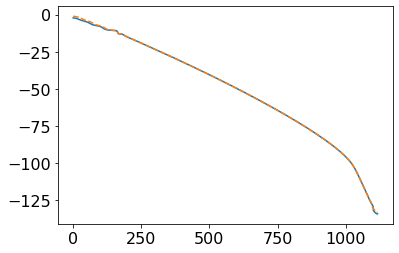

In [115]:
plt.plot(times, np.unwrap(np.angle(h)))
plt.plot(times, np.unwrap(np.angle(s)), ls='--')

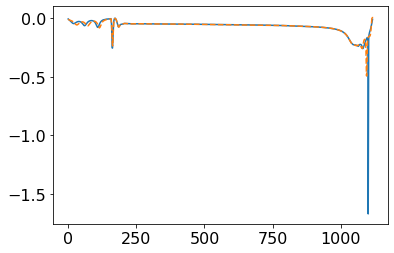

In [116]:
plt.plot(times[:-1], np.diff(np.unwrap(np.angle(h))))
plt.plot(times[:-1], np.diff(np.unwrap(np.angle(s))), ls='--')

(-0.5, 0.0)

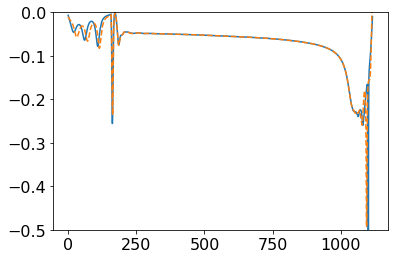

In [117]:
plt.plot(times[:-1], np.diff(np.unwrap(np.angle(h))))
plt.plot(times[:-1], np.diff(np.unwrap(np.angle(s))), ls='--')
plt.ylim(-0.5, 0)

(900.0, 1200.0)

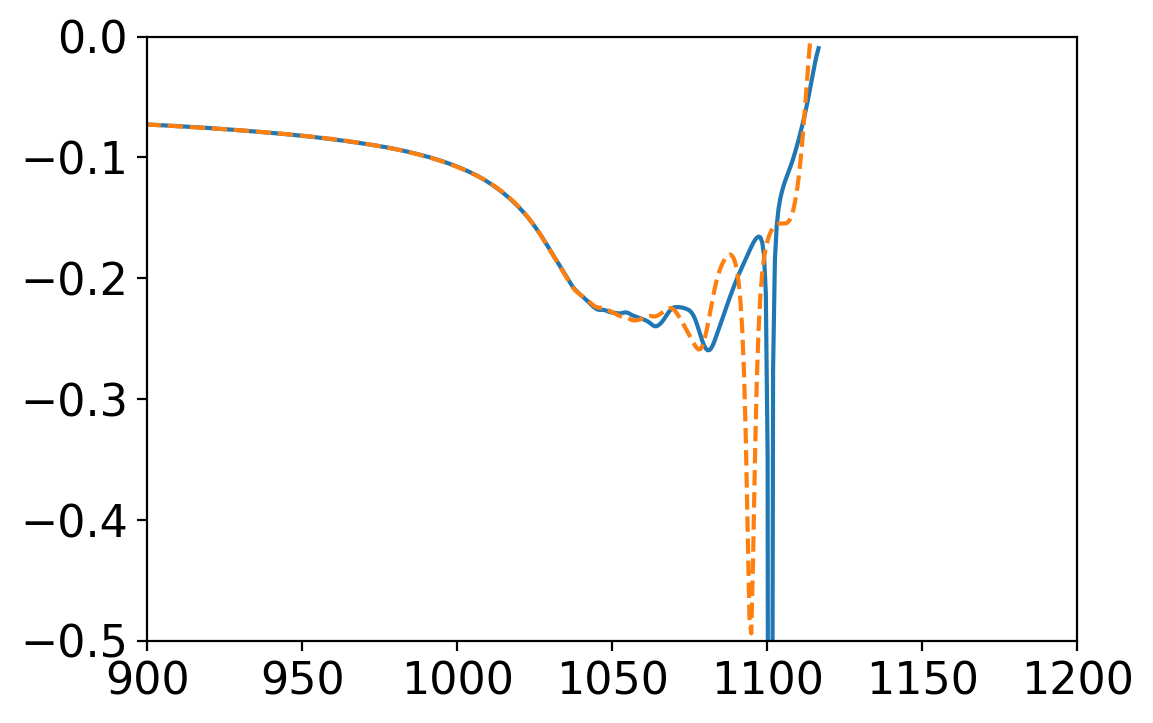

In [118]:
plt.figure(dpi=200)
plt.plot(times[:-1], np.diff(np.unwrap(np.angle(h))))
plt.plot(times[:-1], np.diff(np.unwrap(np.angle(s))), ls='--')
plt.ylim(-0.5, 0)
plt.xlim(900, 1200)